# Figure 4.7, 4.8, 4.9, and 4.19A

Symmetric (bistable) biological networks.

In [1]:
using LinearAlgebra
using DifferentialEquations
using Parameters
using LabelledArrays

using Plots
Plots.gr(fmt=:png, lw=2)

Plots.GRBackend()

In [2]:
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
"Model of symmetric network from Figure 4.6. This code generates Figures 4.7, 4.8, 4.9, and 4.19A"
function model!(du, u, p, t)
    @unpack K1, K2, K3, K4, N1, N2 = p
    @unpack s1, s2 = u
    du.s1 = K1 * hill(1, s2, N2) - K3 * s1
    du.s2 = K2 * hill(1, s1, N1) - K4 * s2
    return du
end

model!

In [4]:
params = (K1=20.0, K2=20.0, K3=5.0, K4=5.0, N1=1.0, N2=4.0)

(K1 = 20.0, K2 = 20.0, K3 = 5.0, K4 = 5.0, N1 = 1.0, N2 = 4.0)

In [5]:
function df(x, y, p = params)
	u = LVector(s1=x, s2=y)
	du = similar(u)
	model!(du, u, p, 0.0)

	# Tweaking arrow length
	du ./ (norm(du)^0.5 * 20)
end

df (generic function with 2 methods)

In [6]:
u0s = (LVector(s1=3.0, s2=1.0), LVector(s1=1.0, s2=3.0))

(2-element LArray{Float64, 1, Vector{Float64}, (:s1, :s2)}:
 :s1 => 3.0
 :s2 => 1.0, 2-element LArray{Float64, 1, Vector{Float64}, (:s1, :s2)}:
 :s1 => 1.0
 :s2 => 3.0)

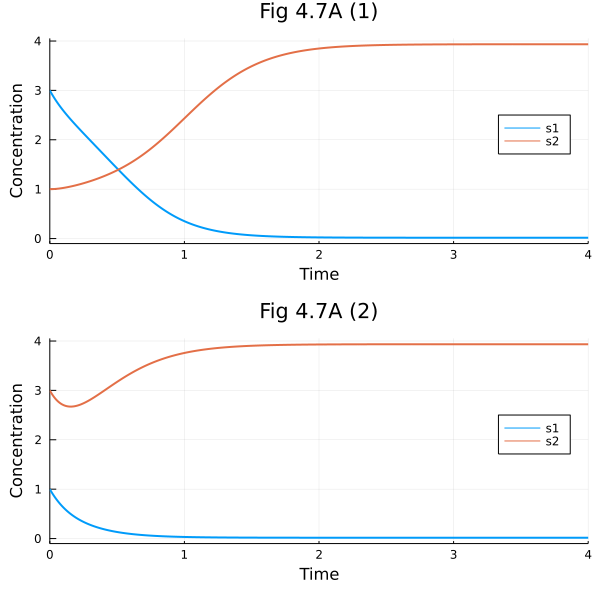

In [7]:
tend = 4.0
sols = map(u0 -> solve(ODEProblem(model!, u0, tend, params)), u0s)

p1 = plot(sols[1], xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.7A (1)")
p2 = plot(sols[2], xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.7A (2)")
fig47a = plot(p1, p2, layout=(2, 1), size=(600, 600))

In [8]:
nullclineS1(s2, p) = p.K1 / p.K3 * hill(1, s2, p.N2)
nullclineS1(s2) = nullclineS1(s2, params)
nullclineS2(s1, p) = p.K2 / p.K4 * hill(1, s1, p.N1)
nullclineS2(s1) = nullclineS2(s1, params)

nullclineS2 (generic function with 2 methods)

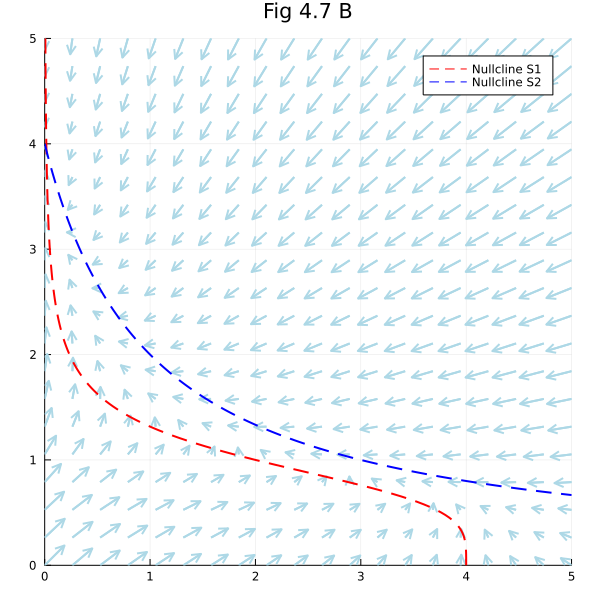

In [9]:
r = LinRange(0.0, 5.0, 20)
xx = [x for y in r, x in r]
yy = [y for y in r, x in r]
pl = quiver(xx, yy, quiver=df, line=(:lightblue))

plot!(pl, nullclineS1, identity, 0.0, 5.0, lab="Nullcline S1", line=(:dash, :red))
plot!(pl, identity, nullclineS2, 0.0, 5.0, lab="Nullcline S2", line=(:dash, :blue))
plot!(pl, title="Fig 4.7 B", xlim=(0.0, 5.0), ylim=(0.0, 5.0), aspect_ratio = 1.0, size = (600, 600))

In [10]:
# Symmetric inhibition
params2 = (K1=20.0, K2=20.0, K3=5.0, K4=5.0, N1=4.0, N2=4.0)

(K1 = 20.0, K2 = 20.0, K3 = 5.0, K4 = 5.0, N1 = 4.0, N2 = 4.0)

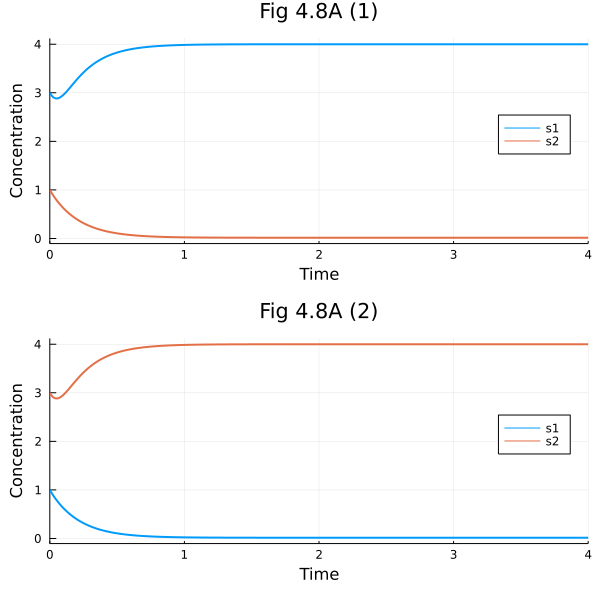

In [11]:
tend = 4.0
sols = map(u0 -> solve(ODEProblem(model!, u0, tend, params2)), u0s)
pl1 = plot(sols[1], xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.8A (1)")
pl2 = plot(sols[2], xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.8A (2)")
fig48a = plot(pl1, pl2, layout=(2, 1), size=(600, 600))

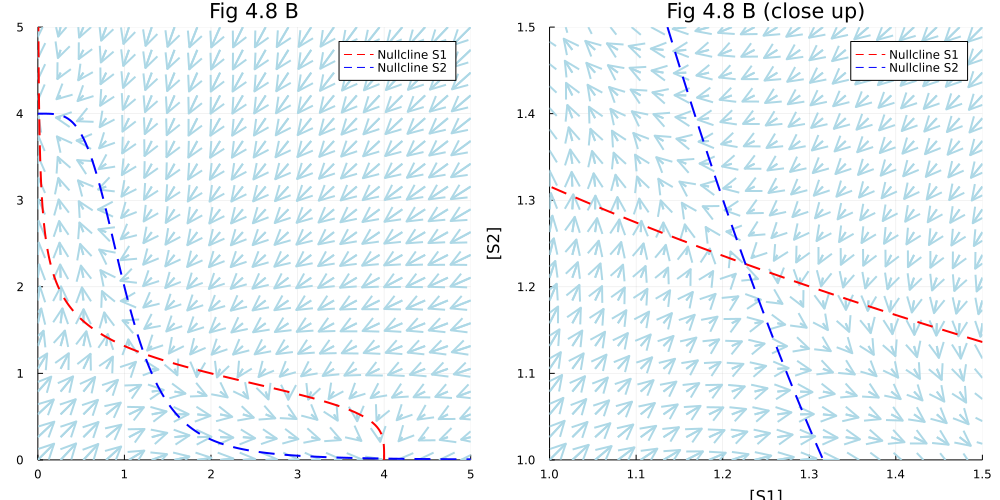

In [12]:
fig48b = let
	df2(x, y) = df(x, y, params2)
	
	r = LinRange(0.0, 5.0, 20)
	xx = [x for y in r, x in r]
	yy = [y for y in r, x in r]
	
	fig48b = quiver(xx, yy, quiver=df2, line=(:lightblue))
	
	plot!(fig48b, s2 -> nullclineS1(s2, params2) , identity, r[1], r[end], lab="Nullcline S1", line=(:dash, :red))
	plot!(fig48b, identity, s1 -> nullclineS2(s1, params2), r[1], r[end], lab="Nullcline S2", line=(:dash, :blue))
	plot!(fig48b, title="Fig 4.8 B", xlim=(r[1], r[end]), ylim=(r[1], r[end]), aspect_ratio = :equal)
	
	
	r2 = LinRange(1.0, 1.5, 20)
	xx2 = [x for y in r2, x in r2]
	yy2 = [y for y in r2, x in r2]
	
	pl2 = quiver(xx2, yy2, quiver=(x, y) -> df2(x,y) ./ 5, line=(:lightblue))
	
	plot!(pl2, s2 -> nullclineS1(s2, params2), identity, r2[1], r2[end], lab="Nullcline S1", line=(:dash, :red))
	plot!(pl2, identity, s1 -> nullclineS2(s1, params2), r2[1], r2[end], lab="Nullcline S2", line=(:dash, :blue))
	plot!(pl2, title="Fig 4.8 B (close up)", xlim=(r2[1], r2[end]), ylim=(r2[1], r2[end]), aspect_ratio = :equal, xlabel="[S1]", ylabel="[S2]")
	
	plot(fig48b, pl2, size=(1000, 500))
end

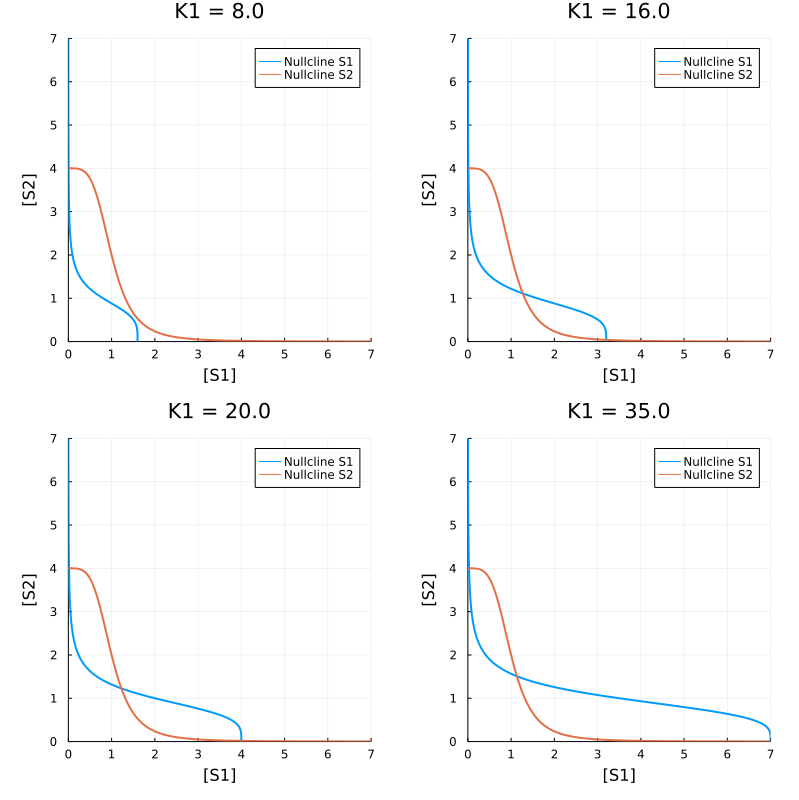

In [13]:
pls = map((8.0, 16.0, 20.0, 35.0)) do k1
    p = (K1=k1, K2=20.0, K3=5.0, K4=5.0, N1=4.0, N2=4.0)
    plot(s2 -> nullclineS1(s2, p), s2 -> s2, 0.0, 7.0, lab="Nullcline S1")
    plot!(s1 -> s1, s1 -> nullclineS2(s1, p), 0.0, 7.0, lab="Nullcline S2")
    plot!(title = "K1 = $k1", xlim=(0.0, 7.0), ylim=(0.0, 7.0), 
      aspect_ratio = 1.0, size = (800, 800), xlabel="[S1]", ylabel="[S2]")
end
	
plot(pls...)